# MSA 2024 Phase 2 - Part 1

In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID

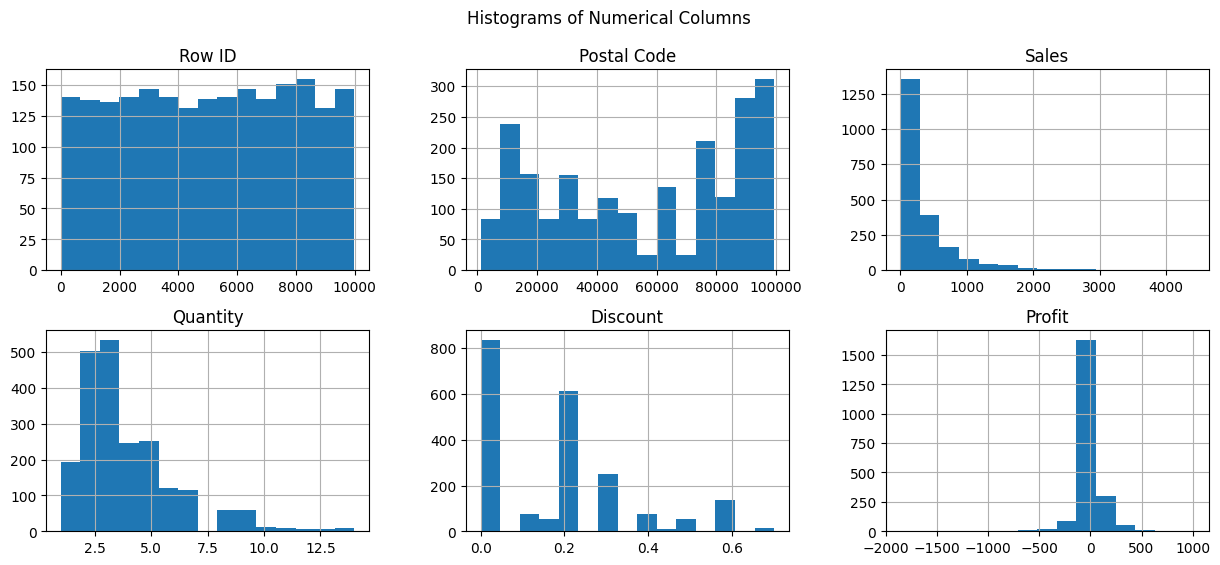

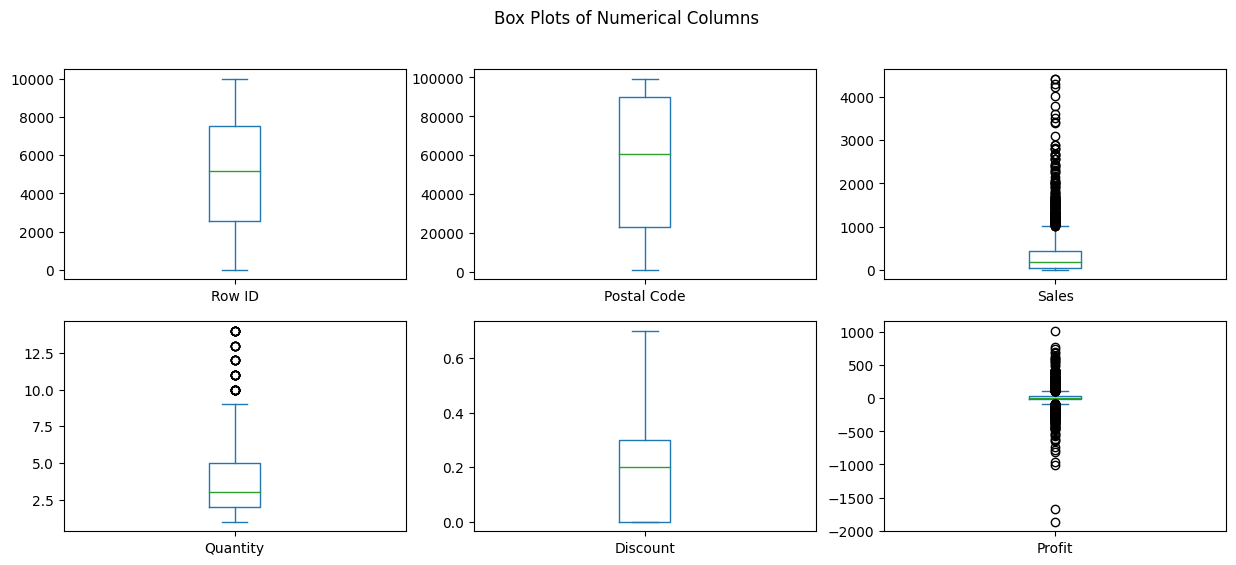

In [2]:
df = pd.read_csv("store_sales.csv", encoding='ISO-8859-1')
print(df.head())
# Get more information about the dataset columns
print(df.info())

print(df.dtypes)

numerical_columns = df.select_dtypes(include=['number']).columns

# Histograms
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Box plots
df[numerical_columns].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 6), title='Box Plots of Numerical Columns')
plt.suptitle('Box Plots of Numerical Columns')
plt.show()

## 2. Clean data

In [3]:
# Convert date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

# Convert categorical columns to numerical codes
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes


# Impute missing values
df.fillna(df.mean(), inplace=True)

# Handling Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalizing Data
scaler = StandardScaler()
df[['Sales', 'Quantity', 'Discount', 'Profit']] = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit']])


## 3. Visualise data

In [4]:
# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)

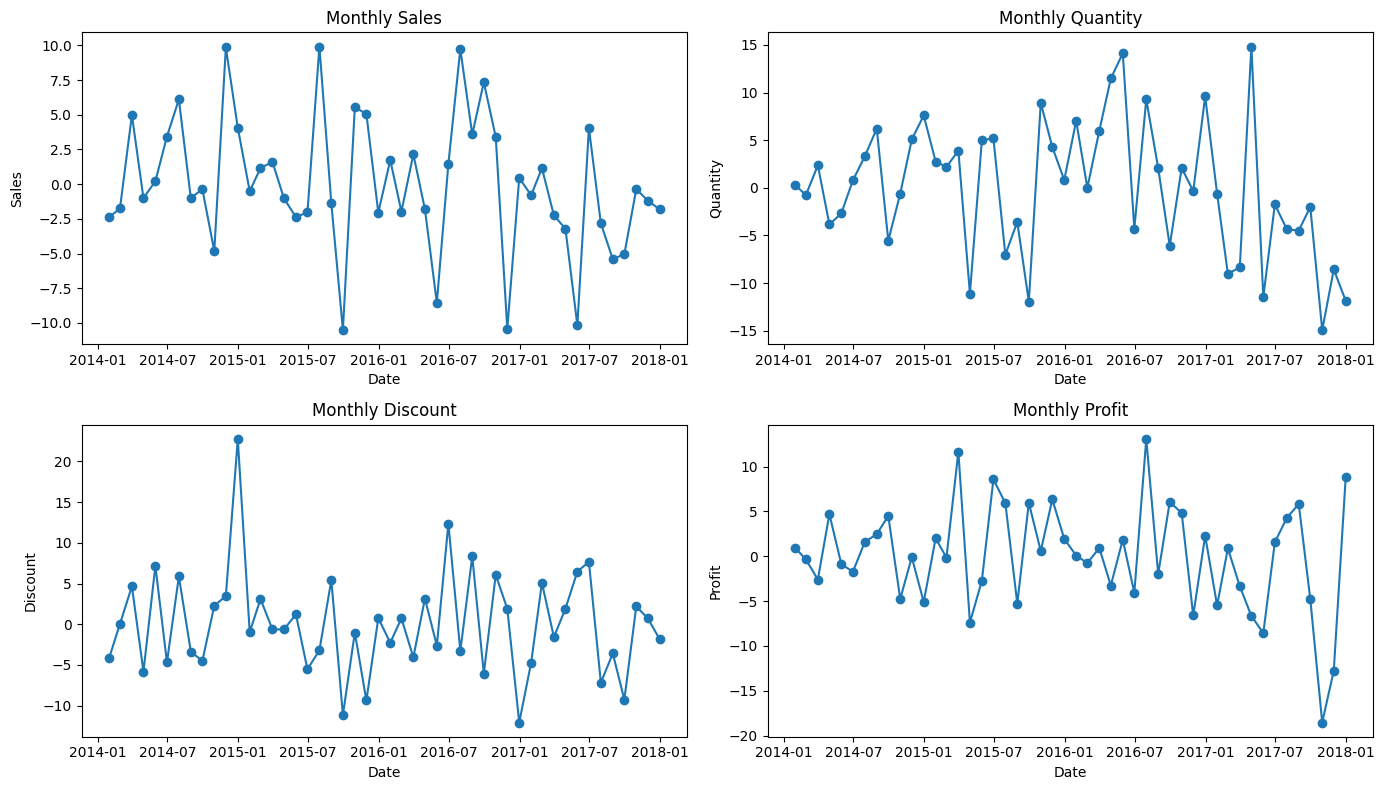

In [5]:
numeric_df = df.select_dtypes(include=[np.number])

# Resample data on a monthly basis
monthly_data = numeric_df.resample('M').sum()

# Plot time-series data
plt.figure(figsize=(14, 8))

# Sales
plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

# Quantity
plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o')
plt.title('Monthly Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')

# Discount
plt.subplot(2, 2, 3)
plt.plot(monthly_data.index, monthly_data['Discount'], marker='o')
plt.title('Monthly Discount')
plt.xlabel('Date')
plt.ylabel('Discount')

# Profit
plt.subplot(2, 2, 4)
plt.plot(monthly_data.index, monthly_data['Profit'], marker='o')
plt.title('Monthly Profit')
plt.xlabel('Date')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

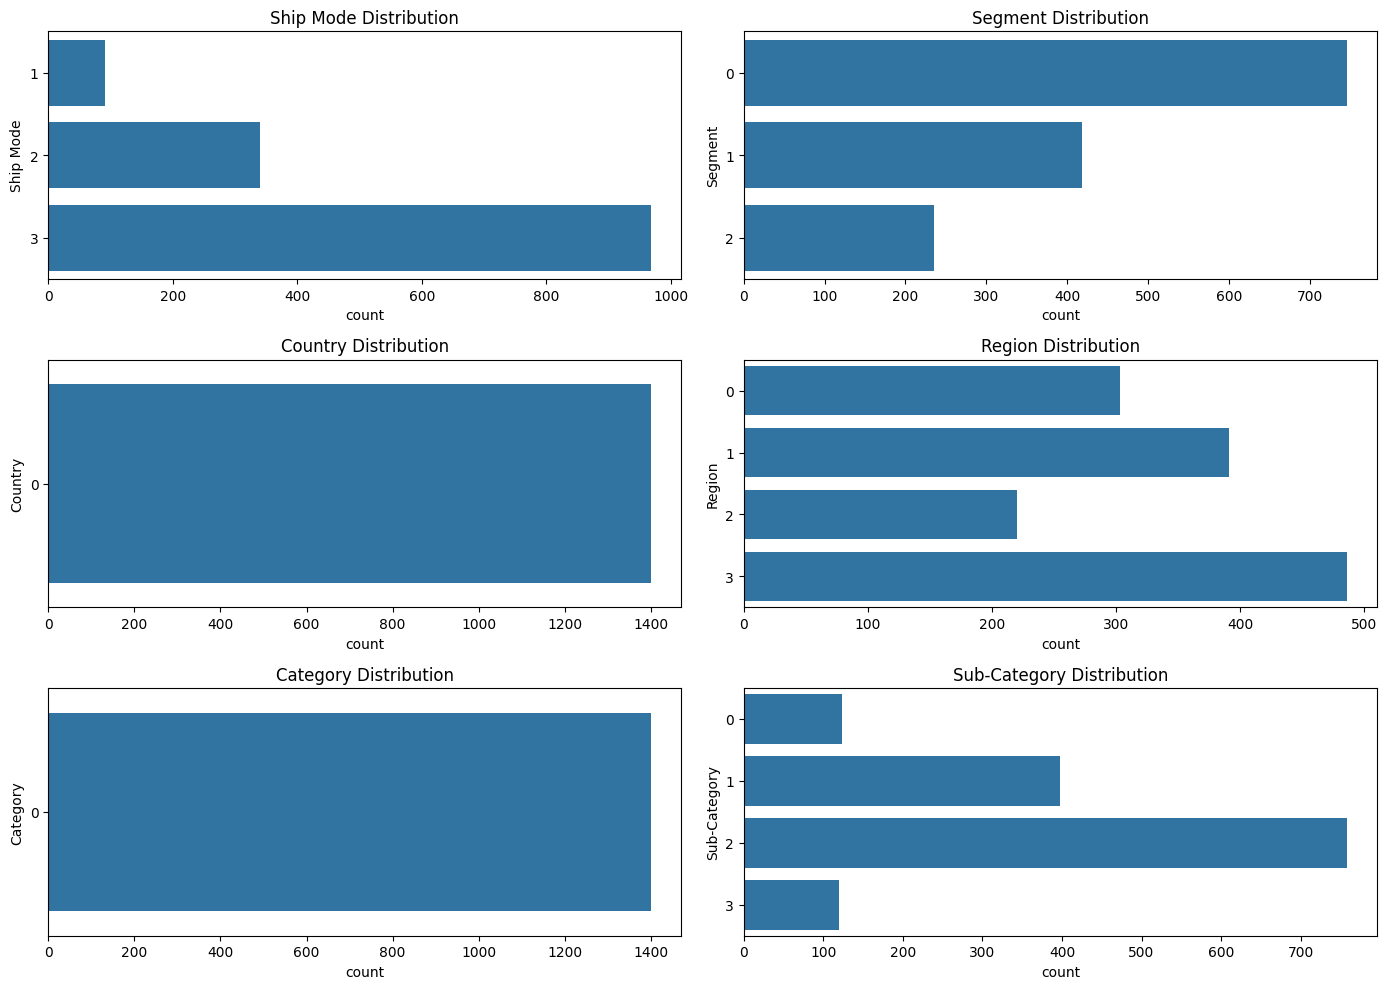

In [6]:
# Plot categorical distributions
plt.figure(figsize=(14, 10))

# Ship Mode
plt.subplot(3, 2, 1)
sns.countplot(y='Ship Mode', data=df)
plt.title('Ship Mode Distribution')

# Segment
plt.subplot(3, 2, 2)
sns.countplot(y='Segment', data=df)
plt.title('Segment Distribution')

# Country
plt.subplot(3, 2, 3)
sns.countplot(y='Country', data=df)
plt.title('Country Distribution')

# Region
plt.subplot(3, 2, 4)
sns.countplot(y='Region', data=df)
plt.title('Region Distribution')

# Category
plt.subplot(3, 2, 5)
sns.countplot(y='Category', data=df)
plt.title('Category Distribution')

# Sub-Category
plt.subplot(3, 2, 6)
sns.countplot(y='Sub-Category', data=df)
plt.title('Sub-Category Distribution')

plt.tight_layout()
plt.show()

## 4. Identify correlated variables

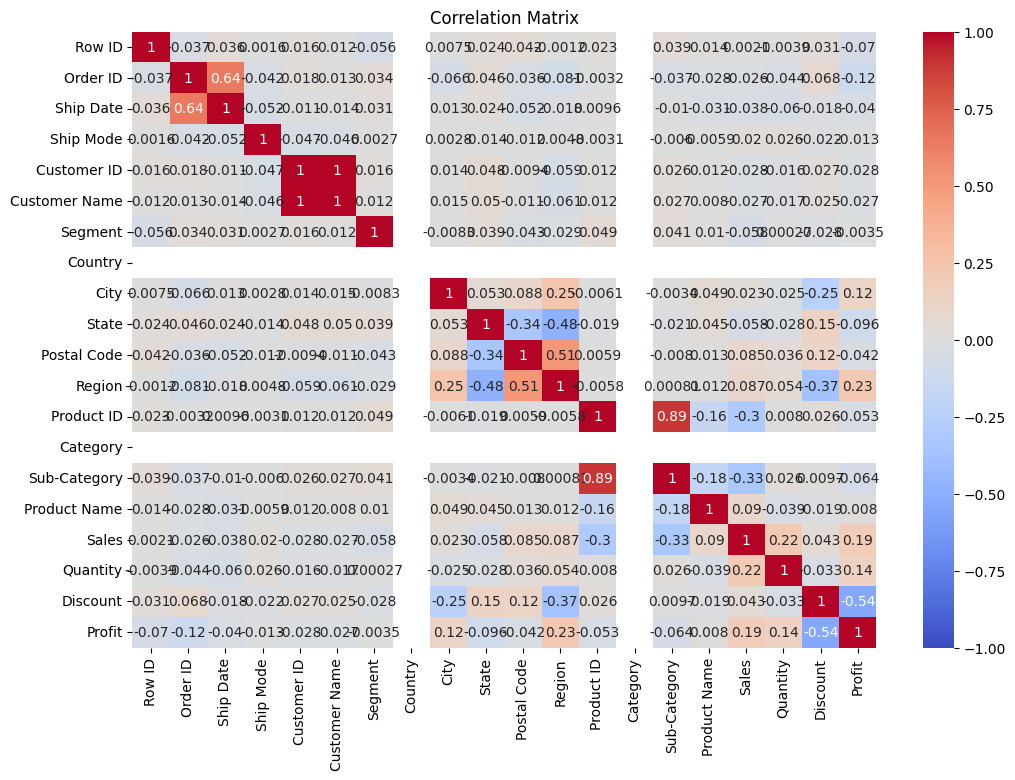

Highly correlated pairs (threshold > 0.8):
Customer ID and Customer Name: 0.9953059931721978
Customer Name and Customer ID: 0.9953059931721978
Product ID and Sub-Category: 0.8916898569122877
Sub-Category and Product ID: 0.8916898569122877


In [7]:
corr_matrix = df.corr(method='pearson')

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features
threshold = 0.8
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2]) 
                   for col1 in corr_matrix.columns 
                   for col2 in corr_matrix.columns 
                   if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

print("Highly correlated pairs (threshold > 0.8):")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2}: {corr_value}")

## 5. Summary

### Data Types and Conversion:

Converted date columns (`Order Date` and `Ship Date`) to datetime format.
Converted categorical columns to numerical codes using `astype('category').cat.codes`.

### Correlation Analysis:

Computed the Pearson correlation matrix to identify relationships between numerical variables.
Visualized the correlations using a heatmap to easily identify highly correlated pairs .
Identified pairs of highly correlated features with absolute correlation coefficients greater than 0.8:
Customer ID and Customer Name: 0.995
Product ID and Sub-Category: 0.892.

### Missing Values:

Checked for missing values in the dataset.
Imputed missing values with the mean for numerical columns using df.fillna(df.mean(), inplace=True) .

Handling Outliers:

Used the IQR (Interquartile Range) method to detect and remove outliers:
Computed Q1 and Q3: Q1 = df.quantile(0.25) and Q3 = df.quantile(0.75).
Calculated IQR and filtered out outliers: df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)].

Standardization/Normalization:

Standardized numerical columns (Sales, Quantity, Discount, and Profit) using StandardScaler to ensure all features have similar ranges, aiding in better model performance:
scaler = StandardScaler()
df[['Sales', 'Quantity', 'Discount', 'Profit']] = scaler.fit_transform(df[['Sales', 'Quantity', 'Discount', 'Profit']]) .